In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.1232
Epoch [1/5], Step [200/600], Loss: 0.1509
Epoch [1/5], Step [300/600], Loss: 0.0688
Epoch [1/5], Step [400/600], Loss: 0.0509
Epoch [1/5], Step [500/600], Loss: 0.1680
Epoch [1/5], Step [600/600], Loss: 0.0211
Epoch [2/5], Step [100/600], Loss: 0.0174
Epoch [2/5], Step [200/600], Loss: 0.0774
Epoch [2/5], Step [300/600], Loss: 0.0644
Epoch [2/5], Step [400/600], Loss: 0.0206
Epoch [2/5], Step [500/600], Loss: 0.0075
Epoch [2/5], Step [600/600], Loss: 0.0868
Epoch [3/5], Step [100/600], Loss: 0.0261
Epoch [3/5], Step [200/600], Loss: 0.0212
Epoch [3/5], Step [300/600], Loss: 0.0741
Epoch [3/5], Step [400/600], Loss: 0.0328
Epoch [3/5], Step [500/600], Loss: 0.0426
Epoch [3/5], Step [600/600], Loss: 0.0276
Epoch [4/5], Step [100/600], Loss: 0.0533
Epoch [4/5], Step [200/600], Loss: 0.0088
Epoch [4/5], Step [300/600], Loss: 0.0199
Epoch [4/5], Step [400/600], Loss: 0.0224
Epoch [4/5], Step [500/600], Loss: 0.0065
Epoch [4/5], Step [600/600], Loss:

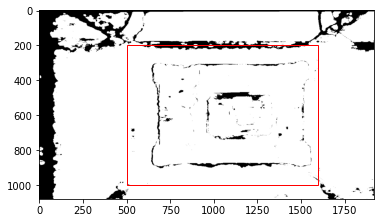

torch.Size([1080, 1920])
tensor([[0.0169, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0206, 0.0000, 0.0200,
         0.0000],
        [0.0179, 0.0180, 0.0179, 0.0179, 0.0178, 0.0177, 0.0175, 0.0175, 0.0177,
         0.0176],
        [0.0178, 0.0179, 0.0159, 0.0160, 0.0150, 0.0150, 0.0150, 0.0149, 0.0150,
         0.0157],
        [0.0179, 0.0180, 0.0160, 0.0159, 0.0150, 0.0150, 0.0150, 0.0150, 0.0155,
         0.0155],
        [0.0177, 0.0178, 0.0159, 0.0159, 0.0150, 0.0135, 0.0131, 0.0137, 0.0158,
         0.0155],
        [0.0178, 0.0179, 0.0000, 0.0158, 0.0149, 0.0137, 0.0130, 0.0134, 0.0157,
         0.0156],
        [0.0177, 0.0178, 0.0157, 0.0158, 0.0148, 0.0136, 0.0136, 0.0135, 0.0157,
         0.0157],
        [0.0177, 0.0178, 0.0158, 0.0159, 0.0149, 0.0149, 0.0149, 0.0150, 0.0157,
         0.0156],
        [0.0178, 0.0178, 0.0157, 0.0157, 0.0150, 0.0149, 0.0148, 0.0149, 0.0155,
         0.0154],
        [0.0178, 0.0177, 0.0175, 0.0176, 0.0176, 0.0175, 0.0175, 0.0175, 0.0173,
   

In [30]:
# DATA 어케 생겼는지 보는 코드
#
#
#


# Depth image? How does it look like?

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open("./DepthImages/Depth_1.png")  # visualization(빨간색 테두리치기) 위한 im
img = mpimg.imread("./DepthImages/Depth_1.png") # tensor 데이터 확인용 img
#im = Image.open("./RGBImages/RGB_1.png")
#img = mpimg.imread("./RGBImages/RGB_1.png")

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)
# Create a Rectangle patch
rect = patches.Rectangle((500, 200), 1100, 800, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()



import torch
tensor = torch.from_numpy(img)
#print(tensor)
print(tensor.size()) 
print(tensor[200:1000:80,500:1600:110]) #[세로:200~1000 약10등분, 가로:500~1600 약10등분]
                                        # depth value : 카메라로부터의 거리에 비례, 이 값이 작으면, 물체의 높이가 큰것임
    
    
    
# 실제 학습 데이터는 저 tensor 중에 일부만 slicing 해서 사용해야 할듯
# slicing 해서 학습 데이터에 넣어주는 함수를 만들까?

In [1]:
# CUSTOM DATASET 만드는 코드
#
# 특징1 : train_set, test_set 분리되지 않은 경우임.
#        train_set, test_set 으로 분리되지 않은 경우, split 하여 train_set, test_set 각각 만들어서 사용
# 특징2 : data 가 RGB image 와 depth image 의 pair 로 이루어져 있음.
#  
# Image322 랑 Image332 가 이상함 -> 삭제함
# rgb 332 만 있고 나머지 없었음.
# label 322 만 있고 나머지 없었음.
# 화가 나네...이것때문에 몇시간을 날렸는데, 데이터 제대로 안만드나

import torch
train_ratio = 0.8 # train_ratio : train_set 비율

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir):
        self.img_dir = img_dir
    
        from collections import OrderedDict
        
        #label indexing 용 ordered dictionary
        self.ordered_dic_for_label = OrderedDict()
        #img data indexing 용 ordered dictionary
        self.ordered_dic_for_rgb = OrderedDict()
        #depth data indexing 용 ordered dictionary
        self.ordered_dic_for_depth = OrderedDict()
        
        #label indexing##################################################################
        from os.path import isfile, join                                                #
        import json                                                                     #
        f = open(join(img_dir,"GroundTruth/GroundTruth_All_388_Images.json"))# 파일 열음  #
        data = json.load(f)                                                             #
                                                                                        #
        # (index, label) -> ordered_dic_for_label 에 넣기                                #
        for index, (key, value) in enumerate(data["Measurements"].items()):             #
            self.ordered_dic_for_label[int(index)] = value['FreshWeightShoot']          #
        f.close()# 파일 닫음                                                              #
        #################################################################################
        
        #rgb data indexing#############################################################################
        from os.path import isfile, join                                                              #
        import json                                                                                   #
        f = open(join(img_dir,"GroundTruth/GroundTruth_All_388_Images.json"))# 파일 열음                #
        data = json.load(f)                                                                           #
        # (index, rgb tensor) -> ordered_dic_for_rgb 에 넣기                                           #
        import matplotlib.image as mpimg                                                              #
        import torch                                                                                  #
        for index, (key, value) in enumerate(data["Measurements"].items()):                           #
            img = mpimg.imread(join(img_dir,"RGBImages/", str(value['RGB_Image'])))                   #
            tensor = torch.from_numpy(img)                                                            #
            #print("rgb data size : ",tensor.size(), "index : ", index) # torch.Size([1080, 1920, 3])  #
            print("rgb data name : ",str(value['RGB_Image']), "index : ", index)
            #print(tensor)                                                                            #
            self.ordered_dic_for_rgb[int(index)] = tensor                                             #
        f.close()# 파일 닫음                                                                            #
        ###############################################################################################
        
        #depth data indexing###########################################################################
        from os.path import isfile, join                                                              #
        import json                                                                                   #
        f = open(join(img_dir,"GroundTruth/GroundTruth_All_388_Images.json"))# 파일 열음                #
        data = json.load(f)                                                                           #
        # (index, depth tensor) -> ordered_dic_for_depth 에 넣기                                       #
        import matplotlib.image as mpimg                                                              #
        import torch                                                                                  #
        for index, (key, value) in enumerate(data["Measurements"].items()):                           #
            img = mpimg.imread(join(img_dir,"DepthImages/", str(value['Depth_Information'])))        #
            tensor = torch.from_numpy(img)                                                            #
            #print("depth data size : ",tensor.size(), "index : ", index) # torch.Size([1080, 1920])   #
            print("depth data name : ",str(value['Depth_Information']), "index : ", index)
            #print(tensor)                                                                            #
            self.ordered_dic_for_depth[int(index)] = tensor                                           #
                                                                                                      #
        f.close()# 파일 닫음                                                                            #
        ###############################################################################################

        print(len(self.ordered_dic_for_label))
        print(len(self.ordered_dic_for_rgb))
        print(len(self.ordered_dic_for_depth))
        # 위 3개 모두 387로 같은 값
        
    def __getitem__(self, index):
        label = ordered_dic_for_label[index]
        rgb = ordered_dic_for_rgb[index]
        depth = ordered_dic_for_depth[index]
        
        return (rgb, depth), label  #(rgb image, depth image) tuple 을 하나의 데이터로 return 함. 
                                    #나중에 dataloader 사용할땐, x[0], x[1] 로 indexing 해서 사용하는 것을 추천.
    
    def __len__(self):
        
        return len(self.ordered_dic_for_label)
    
    
full_dataset = CustomDataset(img_dir="./lettuce_dataset")

train_size = int(train_ratio * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])


train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=4,
                                          shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=4,
                                          shuffle=True)

print("Dataset and Dataloader are ready now!")

rgb data name :  RGB_27.png index :  0
rgb data name :  RGB_79.png index :  1
rgb data name :  RGB_140.png index :  2
rgb data name :  RGB_203.png index :  3
rgb data name :  RGB_292.png index :  4
rgb data name :  RGB_38.png index :  5
rgb data name :  RGB_97.png index :  6
rgb data name :  RGB_157.png index :  7
rgb data name :  RGB_218.png index :  8
rgb data name :  RGB_317.png index :  9
rgb data name :  RGB_47.png index :  10
rgb data name :  RGB_48.png index :  11
rgb data name :  RGB_49.png index :  12
rgb data name :  RGB_50.png index :  13
rgb data name :  RGB_52.png index :  14
rgb data name :  RGB_53.png index :  15
rgb data name :  RGB_100.png index :  16
rgb data name :  RGB_101.png index :  17
rgb data name :  RGB_104.png index :  18
rgb data name :  RGB_107.png index :  19
rgb data name :  RGB_108.png index :  20
rgb data name :  RGB_109.png index :  21
rgb data name :  RGB_110.png index :  22
rgb data name :  RGB_111.png index :  23
rgb data name :  RGB_112.png index :

rgb data name :  RGB_256.png index :  200
rgb data name :  RGB_257.png index :  201
rgb data name :  RGB_312.png index :  202
rgb data name :  RGB_313.png index :  203
rgb data name :  RGB_318.png index :  204
rgb data name :  RGB_323.png index :  205
rgb data name :  RGB_328.png index :  206
rgb data name :  RGB_329.png index :  207
rgb data name :  RGB_330.png index :  208
rgb data name :  RGB_333.png index :  209
rgb data name :  RGB_334.png index :  210
rgb data name :  RGB_335.png index :  211
rgb data name :  RGB_336.png index :  212
rgb data name :  RGB_338.png index :  213
rgb data name :  RGB_339.png index :  214
rgb data name :  RGB_340.png index :  215
rgb data name :  RGB_341.png index :  216
rgb data name :  RGB_342.png index :  217
rgb data name :  RGB_15.png index :  218
rgb data name :  RGB_106.png index :  219
rgb data name :  RGB_176.png index :  220
rgb data name :  RGB_268.png index :  221
rgb data name :  RGB_351.png index :  222
rgb data name :  RGB_5.png index : 

depth data name :  Depth_49.png index :  12
depth data name :  Depth_50.png index :  13
depth data name :  Depth_52.png index :  14
depth data name :  Depth_53.png index :  15
depth data name :  Depth_100.png index :  16
depth data name :  Depth_101.png index :  17
depth data name :  Depth_104.png index :  18
depth data name :  Depth_107.png index :  19
depth data name :  Depth_108.png index :  20
depth data name :  Depth_109.png index :  21
depth data name :  Depth_110.png index :  22
depth data name :  Depth_111.png index :  23
depth data name :  Depth_112.png index :  24
depth data name :  Depth_113.png index :  25
depth data name :  Depth_114.png index :  26
depth data name :  Depth_115.png index :  27
depth data name :  Depth_164.png index :  28
depth data name :  Depth_165.png index :  29
depth data name :  Depth_166.png index :  30
depth data name :  Depth_167.png index :  31
depth data name :  Depth_168.png index :  32
depth data name :  Depth_170.png index :  33
depth data nam

depth data name :  Depth_217.png index :  194
depth data name :  Depth_250.png index :  195
depth data name :  Depth_251.png index :  196
depth data name :  Depth_253.png index :  197
depth data name :  Depth_254.png index :  198
depth data name :  Depth_255.png index :  199
depth data name :  Depth_256.png index :  200
depth data name :  Depth_257.png index :  201
depth data name :  Depth_312.png index :  202
depth data name :  Depth_313.png index :  203
depth data name :  Depth_318.png index :  204
depth data name :  Depth_323.png index :  205
depth data name :  Depth_328.png index :  206
depth data name :  Depth_329.png index :  207
depth data name :  Depth_330.png index :  208
depth data name :  Depth_333.png index :  209
depth data name :  Depth_334.png index :  210
depth data name :  Depth_335.png index :  211
depth data name :  Depth_336.png index :  212
depth data name :  Depth_338.png index :  213
depth data name :  Depth_339.png index :  214
depth data name :  Depth_340.png i

depth data name :  Depth_40.png index :  376
depth data name :  Depth_88.png index :  377
depth data name :  Depth_89.png index :  378
depth data name :  Depth_90.png index :  379
depth data name :  Depth_161.png index :  380
depth data name :  Depth_207.png index :  381
depth data name :  Depth_252.png index :  382
depth data name :  Depth_314.png index :  383
depth data name :  Depth_316.png index :  384
depth data name :  Depth_321.png index :  385
depth data name :  Depth_337.png index :  386
387
387
387
Dataset and Dataloader are ready now!


In [4]:
import torch
import torch.nn.functional as F

#x = torch.randn((256, 96, 128, 128)).cuda()
x = torch.randn((10,2,3,4)).cuda()

print(F.avg_pool2d(x, x.size()[2:]).size())
print(F.adaptive_avg_pool2d(x, (1, 1)).size())
print(torch.mean(x.view(x.size(0), x.size(1), -1), dim=2).size())

torch.Size([10, 2, 1, 1])
torch.Size([10, 2, 1, 1])
torch.Size([10, 2])


In [9]:
import torch
import torch.nn as nn

#x = torch.rand((2,3,4,5)).cuda()
x = torch.tensor(
                [[[[1,2,3,4,5],
                  [2,3,4,5,6],
                  [3,4,5,6,7],
                  [4,5,6,7,8]],
                  
                  [[1,2,3,4,5],
                  [2,3,4,5,6],
                  [3,4,5,6,7],
                  [4,5,6,7,8]],
                  
                  [[1,2,3,4,5],
                  [2,3,4,5,6],
                  [3,4,5,6,7],
                  [4,5,6,7,8]]],

                [[[1,2,3,4,5],
                  [2,3,4,5,6],
                  [3,4,5,6,7],
                  [4,5,6,7,8]],
                  
                  [[1,2,3,4,5],
                  [2,3,4,5,6],
                  [3,4,5,6,7],
                  [4,5,6,7,8]],
                  
                  [[1,2,3,4,5],
                  [2,3,4,5,6],
                  [3,4,5,6,7],
                  [4,5,6,7,8]]]]

                ,dtype=torch.float32
                ).cuda()
print(x.size())

m = nn.AvgPool2d(x.size()[2:])

x = m(x)

print(x)
print(x.size())

torch.Size([2, 3, 4, 5])
tensor([[[[4.5000]],

         [[4.5000]],

         [[4.5000]]],


        [[[4.5000]],

         [[4.5000]],

         [[4.5000]]]], device='cuda:0')
torch.Size([2, 3, 1, 1])


In [ ]:
# 네트워크 만드는 코드
#
#
#
#
import torch.nn as nn

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.rgb_channel_processing_block = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 3, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(3),
            nn.ReLU()
            #nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.depth_channel_processing_block = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 1, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(1),
            nn.ReLU()
        )
        
        self.rgb_regressor = nn.Sequential(
            nn.AvgPool2d(x.size()[2:]), # global average pool
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=3*1*1, out_features=4, bias=True)
        )
        
        self.depth_regressor = nn.Sequential(
            nn.AvgPool2d(x.size()[2:]), # global average pool
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1*1*1, out_features=1, bias=True)
        )

        self.dropout = nn.Dropout(p=0.5)
        #concat 어떻게?
        self.fc1 = nn.Linear(5, 2048)
        
        
    def forward(self, rgb, depth):
        
        rgb = self.rgb_channel_processing_block(rgb)
        depth = self.depth_stream(depth)
        
        #
        rgb = self.layer1(rgb)
        rgb = self.layer2(rgb)
        out = out.reshape(out.size(0), -1) #out.size(0) 는 batch size 임, batch size 축 빼놓고 나머지 차원은 모두 linear 로 만들기
        out = self.fc(out)
        
        
        return out

model = ConvNet(num_classes).to(device)

In [5]:
x = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [10,11,12]],
                 
                  [[13,14,15],
                   [16,17,18],
                   [19,20,21],
                   [22,23,24]]])
print(x)
print(x.size())

print()

x = x.reshape(x.size(0), -1)
print(x)
print(x.size())

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]])
torch.Size([2, 4, 3])

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])
torch.Size([2, 12])
